# 18.06 pset 11 - Solutions


## Problem 1

A key fact leading to the SVD is that for any $m\times n$ real matrix $A$, the positive semidefinite (eigenvalues ≥ 0) matrices $A^T A$ and $A A^T$ have the same nonzero eigenvalues $\sigma_k^2 > 0$, where the $\sigma_k$ are called the **singular values** of $A$, for $k = 1,2,\ldots,r$, for $r=\operatorname{rank}(A)$.  So, the SVD simultaneously diagonalizes $A^T A$ and $A A^T$.

In this problem, you will derive the "reduced" form of the SVD based only on what you know about eigenvectors.

**(a)** Suppose $\lambda = \sigma^2 > 0$ is one of the $r$ nonzero eigenvalues (if any) of $A A^T$ (they cannot be negative because $A A^T$ is positive semidefinite for any $A$).  That is, $AA^T u = \sigma^2 u$ for some eigenvector $u$, normalized to $u^T u = 1$.   Find an eigenvector $v$ of $A^T A$ with the *same* eigenvalue, normalized to $v^T v = 1$.  (Hint: show that $A^T A (A^T u) = \cdots$.  Check your $v^T v$ to make sure that it is 1!)

**(b)** Why aren't the eigenvectors for λ=0 eigenvalues related in the same way, i.e. why isn't there a 1-to-1 correspondence between the λ=0 eigenvectors of $A A^T$ and $A^T A$, just as in the previous part?  (Hint: long ago, in class, we showed $N(A^T) = N(AA^T)$ for any $A$... this was a key point in least-squares problems.)

**(c)** How do your eigenvectors $u$ and $v$ from (a) relate to the solution of problem 2 from pset 9?

**(d)** Since $N(A) = N(A^T A)$ (we derived this long ago in class, for least-squares and projection problems), explain why $A x = A \hat{V} \hat{V}^T x$ for any $x$, where $\hat{V}$ is the $n \times r$ matrix whose columns are the *orthonormal eigenvectors* $v_1,\ldots,v_r$ of $A^T A$ with positive eigenvalues $\sigma_1^2,\ldots,\sigma_r^2 > 0$.  (Recall that $\hat{V} \hat{V}^T$ is the projection operation onto $C(\hat{V})$.  Hint: $C(\hat{V})$ is the orthogonal complement of the nullspaces of what matrices?)

**(e)** Take the $r = \operatorname{rank}(A)$ nonzero eigenvectors $\sigma_k^2$ of $AA^T$ (or $A^T A$) and the corresponding orthonormal eigenvectors $u_k$ and $v_k$ from part (a).  Form the $m \times r$ matrix $\hat{U}$ whose columns are $u_1,\ldots,u_r$, along with the corresponding $\hat{V}$ matrix from above.  Form the $r \times r$ *diagonal* matrix $\hat{\Sigma}$ whose diagonal entries are $\sigma_1,\ldots,\sigma_r$.

* Show that $A\hat{V} = \hat{U} \hat{\Sigma}$.

* Explain why it follows from (d) that $A = \hat{U} \hat{\Sigma} \hat{V}^T$.  This is the [reduced SVD](https://en.wikipedia.org/wiki/Singular_value_decomposition#Reduced_SVDs): in the ordinary SVD you have *square* unitary matrices $U$ and $V$ and a non-square $m \times n$ diagonal matrix $\Sigma$.


### Solution
#### (a)
We will let $v=\alpha A^Tu$, where $\alpha$ is some scalar to be determined when we normalize $v$. This is an eigenvector of $A^TA$ because
$$ (A^TA)v = (A^TA)\left(\alpha A^Tu\right) = \alpha A^T(AA^T)u = \alpha A^T\lambda u = \lambda \left(\alpha A^Tu\right)= \lambda v$$
so we only need to find $\alpha$ such that $v$ has norm 1 (and at the same time we will also prove that $v$ is nonzero, which is an important condition to check!). In fact
$$ v^Tv = \left(\alpha A^Tu\right)^T\left(\alpha A^Tu\right) = \alpha^2 u^TAA^Tu = \alpha^2 \lambda u^Tu = (\alpha \sigma)^2 $$, which $=1$ if $\alpha = \pm \sigma^{-1}$.  We will choose $+\sigma^{-1}$, and hence $\boxed{v =\sigma^{-1}A^T u}$.
#### (b)
Suppose now that $u$ is in the nullspace of $AA^T$. Then in our correspondence we would like to send $u$ to some multiple of $A^Tu$. But we have seen in class that $N(AA^T)=N(A^T)$, so $A^Tu=0$ and no multiple can be an eigenvector (since eigenvectors are required to be nonzero). The same situation holds for $v$ in the nullspace of $A^TA$ and $u=Av$.

Another problem is that $A^T A$ is $n \times n$ while $A A^T$ is $m \times m$.  So the nullspace of $A^T A$ has dimension $n-r$ while the nullspace of $A A^T$ has dimension $m-r$.  If $m\ne n$, therefore there is no way to make a one-to-one-correspondence between the $\lambda=0$ eigenvectors, because there are different numbers of them!
#### (c)
If $\{u,v\}$ is a pair of eigenvectors of $AA^T$ and $A^TA$ corresponding to the nonzero eigenvalue $\lambda$ as in part **(a)**, the column vector $(u; v)$ forms an eigenvector for the matrix $B=\begin{pmatrix} 0 & A\\ A^T& 0\end{pmatrix}$ with eigenvalue $\sigma = \sqrt{\lambda}$. In fact we have seen that $v=\frac{1}{\sigma}A^Tu$ and $u=\frac{1}{\sigma}Av$ so
$$\begin{cases} Av & =\sigma u\\ A^Tu & =\sigma v\end{cases}\Leftrightarrow \begin{pmatrix} 0 & A\\ A^T & 0 \end{pmatrix}\begin{pmatrix} u\\v\end{pmatrix} = \sigma \begin{pmatrix} u \\ v\end{pmatrix}$$
So to every pair $\{u,v\}$ of eigenvectors of $AA^T$ and $A^TA$ there is a pair of eigenvectors $\begin{pmatrix}u\\v\end{pmatrix}$, $\begin{pmatrix} u\\-v\end{pmatrix}$ for the matrix $B$ as in problem 2 of problem set 9.

The important consequence of this is that you can get the singular values and singular vectors of $A$ from the eigenvalues and eigenvectors of $B$.  This is the starting point for a famous numerical method for the SVD called **Golub-Kahan Bidiagonalization**.
#### (d)
The matrix $\hat{V}\hat{V}^T$ is the orthogonal projection onto the orthogonal complement of $N(A)=N(A^TA)$ (since $C(\hat{V})$ is precisely the span of the eigenvectors of $A^TA$ with nonzero eigenvalues). In particular, the columns of $I-\hat{V}\hat{V}^T$ are vectors in the nullspace of $A$. Hence
$$ A-A\hat{V}\hat{V}^T=A(I-\hat{V}\hat{V}^T) = 0$$

Another way of thinking of it is that $A\hat{V}\hat{V}^T$ does the same thing as $A$ for all the nonzero-λ eigenvectors $v$ of $A$ (for which $\hat{V}\hat{V}^T v = v$) and also does same thing as $A$ for all $\lambda=0$ eigenvectors $v_0$ of $A$ (for which $\hat{V}\hat{V}^T v_0 = 0$), so therefore it is the same matrix as $A$.  More formally, any vector $x$ can be decomposed into $x_v + x_0$, where $x_0 \in N(A)=N(A^T A)$ and $x_v = \hat{V}\hat{V}^T x \in N(A)^\perp = C(\hat{V})$. Then we have  $Ax = Ax_v = A\hat{V}\hat{V}^T x$, since $A x_0 = 0$, so $A = A\hat{V}\hat{V}^T$.
#### (e)

Recall that matrix multiplication $A\hat{V}$ simply multiplies $A$ by each column of $\hat{V} = \begin{pmatrix} v_1 & v_2 & \cdots & v_r \end{pmatrix}$.  But, since from (a) $Av_i = AA^T u_i / \sigma_i = \sigma_i u_i$, we have:

$$A\hat{V} = \begin{pmatrix} Av_1 & Av_2 & \cdots & A v_r \end{pmatrix} \\
= \begin{pmatrix} \sigma_1 u_1 & \sigma_2 u_2 & \cdots & \sigma_r u_r \end{pmatrix} \\
= \underbrace{\begin{pmatrix}  u_1 &  u_2 & \cdots &  u_r \end{pmatrix}}_{\hat{U}}
\underbrace{\begin{pmatrix} \sigma_1 & & & \\ & \sigma_2 & & \\ & & \ddots & \\ & & & \sigma_r \end{pmatrix}}_{\hat{\Sigma}} = \hat{U} \hat{\Sigma}
$$

since multiplying $\hat{U}$ on the *right* by $\hat{\Sigma}$ scales each column of $\hat{U}$ by $\sigma_1, \ldots, \sigma_r$.

Finally, putting everything together,
$$\hat{U}\hat{\Sigma}\hat{V}^T=(\hat{U}\hat{\Sigma})\hat{V}^T = A\hat{V}\hat{V}^T=A$$
where the last equality comes from part **(d)**.

## Problem 2

Execute the following code cells in the Julia notebook, reading along, and answer the question at the end.

The following matrix represents the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).  Each row is a different flower (150 flowers), and the columns are the measurements (in cm) of the lengths of four different flower parts.

In [1]:
X = [5.1 3.5 1.4 0.2; 4.9 3.0 1.4 0.2; 4.7 3.2 1.3 0.2; 4.6 3.1 1.5 0.2; 5.0 3.6 1.4 0.2; 5.4 3.9 1.7 0.4; 4.6 3.4 1.4 0.3; 5.0 3.4 1.5 0.2; 4.4 2.9 1.4 0.2; 4.9 3.1 1.5 0.1; 5.4 3.7 1.5 0.2; 4.8 3.4 1.6 0.2; 4.8 3.0 1.4 0.1; 4.3 3.0 1.1 0.1; 5.8 4.0 1.2 0.2; 5.7 4.4 1.5 0.4; 5.4 3.9 1.3 0.4; 5.1 3.5 1.4 0.3; 5.7 3.8 1.7 0.3; 5.1 3.8 1.5 0.3; 5.4 3.4 1.7 0.2; 5.1 3.7 1.5 0.4; 4.6 3.6 1.0 0.2; 5.1 3.3 1.7 0.5; 4.8 3.4 1.9 0.2; 5.0 3.0 1.6 0.2; 5.0 3.4 1.6 0.4; 5.2 3.5 1.5 0.2; 5.2 3.4 1.4 0.2; 4.7 3.2 1.6 0.2; 4.8 3.1 1.6 0.2; 5.4 3.4 1.5 0.4; 5.2 4.1 1.5 0.1; 5.5 4.2 1.4 0.2; 4.9 3.1 1.5 0.1; 5.0 3.2 1.2 0.2; 5.5 3.5 1.3 0.2; 4.9 3.1 1.5 0.1; 4.4 3.0 1.3 0.2; 5.1 3.4 1.5 0.2; 5.0 3.5 1.3 0.3; 4.5 2.3 1.3 0.3; 4.4 3.2 1.3 0.2; 5.0 3.5 1.6 0.6; 5.1 3.8 1.9 0.4; 4.8 3.0 1.4 0.3; 5.1 3.8 1.6 0.2; 4.6 3.2 1.4 0.2; 5.3 3.7 1.5 0.2; 5.0 3.3 1.4 0.2; 7.0 3.2 4.7 1.4; 6.4 3.2 4.5 1.5; 6.9 3.1 4.9 1.5; 5.5 2.3 4.0 1.3; 6.5 2.8 4.6 1.5; 5.7 2.8 4.5 1.3; 6.3 3.3 4.7 1.6; 4.9 2.4 3.3 1.0; 6.6 2.9 4.6 1.3; 5.2 2.7 3.9 1.4; 5.0 2.0 3.5 1.0; 5.9 3.0 4.2 1.5; 6.0 2.2 4.0 1.0; 6.1 2.9 4.7 1.4; 5.6 2.9 3.6 1.3; 6.7 3.1 4.4 1.4; 5.6 3.0 4.5 1.5; 5.8 2.7 4.1 1.0; 6.2 2.2 4.5 1.5; 5.6 2.5 3.9 1.1; 5.9 3.2 4.8 1.8; 6.1 2.8 4.0 1.3; 6.3 2.5 4.9 1.5; 6.1 2.8 4.7 1.2; 6.4 2.9 4.3 1.3; 6.6 3.0 4.4 1.4; 6.8 2.8 4.8 1.4; 6.7 3.0 5.0 1.7; 6.0 2.9 4.5 1.5; 5.7 2.6 3.5 1.0; 5.5 2.4 3.8 1.1; 5.5 2.4 3.7 1.0; 5.8 2.7 3.9 1.2; 6.0 2.7 5.1 1.6; 5.4 3.0 4.5 1.5; 6.0 3.4 4.5 1.6; 6.7 3.1 4.7 1.5; 6.3 2.3 4.4 1.3; 5.6 3.0 4.1 1.3; 5.5 2.5 4.0 1.3; 5.5 2.6 4.4 1.2; 6.1 3.0 4.6 1.4; 5.8 2.6 4.0 1.2; 5.0 2.3 3.3 1.0; 5.6 2.7 4.2 1.3; 5.7 3.0 4.2 1.2; 5.7 2.9 4.2 1.3; 6.2 2.9 4.3 1.3; 5.1 2.5 3.0 1.1; 5.7 2.8 4.1 1.3; 6.3 3.3 6.0 2.5; 5.8 2.7 5.1 1.9; 7.1 3.0 5.9 2.1; 6.3 2.9 5.6 1.8; 6.5 3.0 5.8 2.2; 7.6 3.0 6.6 2.1; 4.9 2.5 4.5 1.7; 7.3 2.9 6.3 1.8; 6.7 2.5 5.8 1.8; 7.2 3.6 6.1 2.5; 6.5 3.2 5.1 2.0; 6.4 2.7 5.3 1.9; 6.8 3.0 5.5 2.1; 5.7 2.5 5.0 2.0; 5.8 2.8 5.1 2.4; 6.4 3.2 5.3 2.3; 6.5 3.0 5.5 1.8; 7.7 3.8 6.7 2.2; 7.7 2.6 6.9 2.3; 6.0 2.2 5.0 1.5; 6.9 3.2 5.7 2.3; 5.6 2.8 4.9 2.0; 7.7 2.8 6.7 2.0; 6.3 2.7 4.9 1.8; 6.7 3.3 5.7 2.1; 7.2 3.2 6.0 1.8; 6.2 2.8 4.8 1.8; 6.1 3.0 4.9 1.8; 6.4 2.8 5.6 2.1; 7.2 3.0 5.8 1.6; 7.4 2.8 6.1 1.9; 7.9 3.8 6.4 2.0; 6.4 2.8 5.6 2.2; 6.3 2.8 5.1 1.5; 6.1 2.6 5.6 1.4; 7.7 3.0 6.1 2.3; 6.3 3.4 5.6 2.4; 6.4 3.1 5.5 1.8; 6.0 3.0 4.8 1.8; 6.9 3.1 5.4 2.1; 6.7 3.1 5.6 2.4; 6.9 3.1 5.1 2.3; 5.8 2.7 5.1 1.9; 6.8 3.2 5.9 2.3; 6.7 3.3 5.7 2.5; 6.7 3.0 5.2 2.3; 6.3 2.5 5.0 1.9; 6.5 3.0 5.2 2.0; 6.2 3.4 5.4 2.3; 5.9 3.0 5.1 1.8]

150×4 Array{Float64,2}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮                 
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

This data actually includes 3 different species of flower, and the goal is to figure out how to differentiate between the species based on the above data.  If we number the species 0, 1, and 2 (Iris setosa, Iris virginica and Iris versicolor), then the following array contains the species of each row in $X$:

In [2]:
species = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

150-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2
 2

Before we do any data analysis, we should subtract the mean of all the samples (all the flowers), which can be done efficiently in Julia via the "broadcasting" `.-` operations combined with the function `mean(X,1)` that returns a row vector of the means of each column:

**Erratum**: Due to an error in the problem set, the code accidentally subtracted `mean(X,2)`, the mean of each *row*.  We will proceed in the solutions with the erroneous `A`, and re-do it with the corrected `A` at the end:

In [3]:
A = X .- mean(X,2)

150×4 Array{Float64,2}:
 2.55    0.95   -1.15   -2.35 
 2.525   0.625  -0.975  -2.175
 2.35    0.85   -1.05   -2.15 
 2.25    0.75   -0.85   -2.15 
 2.45    1.05   -1.15   -2.35 
 2.55    1.05   -1.15   -2.45 
 2.175   0.975  -1.025  -2.125
 2.475   0.875  -1.025  -2.325
 2.175   0.675  -0.825  -2.025
 2.5     0.7    -0.9    -2.3  
 2.7     1.0    -1.2    -2.5  
 2.3     0.9    -0.9    -2.3  
 2.475   0.675  -0.925  -2.225
 ⋮                            
 2.1    -0.9     0.9    -2.1  
 2.525  -1.275   1.025  -2.275
 2.25   -1.35    1.15   -2.05 
 2.55   -1.25    0.75   -2.05 
 1.925  -1.175   1.225  -1.975
 2.25   -1.35    1.35   -2.25 
 2.15   -1.25    1.15   -2.05 
 2.4    -1.3     0.9    -2.0  
 2.375  -1.425   1.075  -2.025
 2.325  -1.175   1.025  -2.175
 1.875  -0.925   1.075  -2.025
 1.95   -0.95    1.15   -2.15 

Now, each flower could be viewed as a point in a four-dimensional space (i.e. the 4 measurements) called [feature space](https://en.wikipedia.org/wiki/Feature_vector).  We'd like to find out what are the important directions in this 4d space in order to explain the variations among the individual flowers, and hopefully to identify the fact that there are three different species.

If we just slice this 4d parameter space in a "random" direction, e.g. we plot the 4th coordinate (4th column of A) vs the 1st coordinate (1st column of A), we just see a blob of points.  The different colors are the different species, and they are all mixed up together:

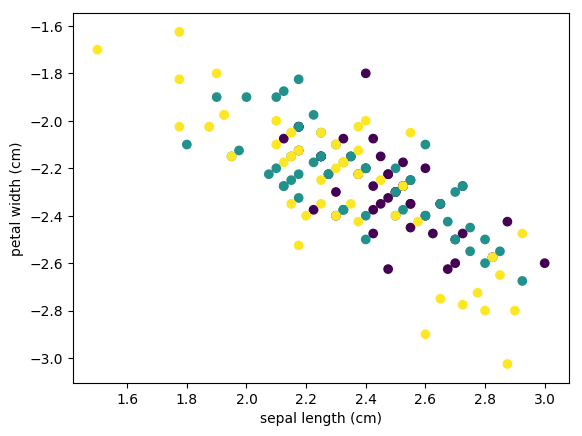

PyObject <matplotlib.text.Text object at 0x3277d7f10>

In [4]:
using PyPlot
scatter(A[:,1], A[:,4], c=species, cmap="viridis")
xlabel("sepal length (cm)")
ylabel("petal width (cm)")

Now, let's perform some principal components analysis (PCA) to try to figure out the "right" way to look at this data.

First, compute the SVD of this matrix $A$, which is equivalent to diagonalizing the covariance matrix $AA^T$ as discussed in class (and in the book):

In [5]:
U, σ, V = svd(A)
σ

4-element Array{Float64,1}:
 40.9812     
 17.0172     
  2.11132    
  7.26536e-15

The singular values σ indicate how much of the variance is explained by each singular vector.

Given this information, you should be able to pick out **two directions** in 4d (two directions in feature space, i.e. two combinations of measurements) that **explain most of the variation between**.   

Fix the code below to compute two 150-component vectors `x1` and `x2`, corresponding two these two combinations of measurements for each flower, and plot `x2` vs `x1`.

You should see that the flowers separate into three groups corresponding to the three different species: PCA identifies the key measurements (or rather, the key combination of measurements) that explain the variations.

In [6]:
x1 = ???
x2 = ???
scatter(x1, x2, c=species, cmap="viridis")

LoadError: syntax: colon expected in "?" expression

Print out this plot (or print to PDF or make a screenshot and attach it electronically on Stellar) and your ??? code with your solutions.

### Solution
The two directions v1 and v2 in our 4d "feature space" which account for the most variance are the two left singular vectors corresponding to the two biggest singular values. That is they are the first two columns of $V$. Then we can write $x_1=Av_1$ and $x_2=Av_2$, which will contain most of the variance.

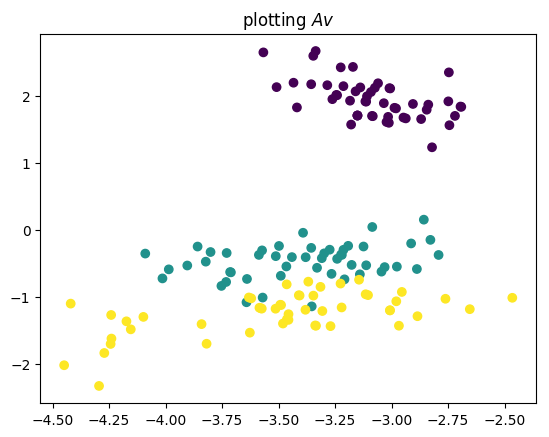

PyObject <matplotlib.text.Text object at 0x3293f2950>

In [7]:
x1 = A*V[:,1]
x2 = A*V[:,2]
scatter(x1, x2, c=species, cmap="viridis")
title(L"plotting $Av$")

As we can see the three species are neatly separated in three different groups.

Equivalently, we could think of the first two columns of $U$ as being the "uncorrelated measurements" that account for most of the variance:

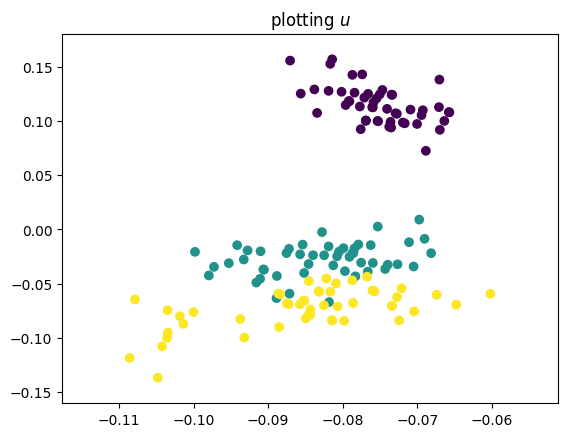

PyObject <matplotlib.text.Text object at 0x3294c4910>

In [8]:
x1 = U[:,1]
x2 = U[:,2]
scatter(x1, x2, c=species, cmap="viridis")
title(L"plotting $u$")

You should notice that **this plot looks exactly the same as above** except that the axes are scaled differently.

This should come as no surprise, since from problem 1 we know that $Av_i = \sigma_i u_i$, so plotting $Av$ or $u$ is the same thing up to a scale factor of $\sigma$.

**Erratum**: as mentioned above, we really should have subtracted `mean(X,1)`, not `mean(X,2)`, in order to do PCA properly: we need to subtract the mean of all of the samples from each measurement (the mean of the *columns* from each column), not the mean of the measurements for each sample.

The following plot is the corrected PCA.  However, in this particular case the ability to discriminate between species doesn't change much:

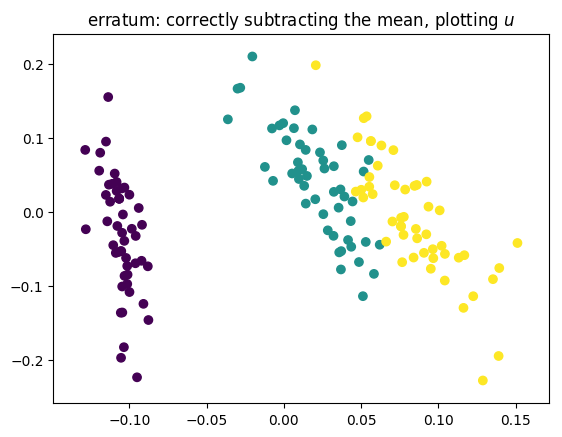

PyObject <matplotlib.text.Text object at 0x3296def90>

In [9]:
U, σ, V = svd(X .- mean(X,1))
scatter(U[:,1], U[:,2], c=species, cmap="viridis")
title(L"erratum: correctly subtracting the mean, plotting $u$")